In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_excel('huatu.xlsx', header=0)
df = df.drop(0)


In [3]:

y1 = df.iloc[:, 0]
y2 = df.iloc[:, 1]
hv = df.iloc[:, 2]

y1_new = df.iloc[:, 4]
y2_new = df.iloc[:, 5]
hv_new = df.iloc[:, 8]

y1_var = df.iloc[:, 6]
y2_var = df.iloc[:, 7]

y1_new = y1_new.values[~np.isnan(y1_new.values)]
y2_new = y2_new .values[~np.isnan(y2_new.values)]
hv_new = hv_new.values[~np.isnan(hv_new.values)]

y1_var = y1_var.values[~np.isnan(y1_var.values)]
y2_var = y2_var.values[~np.isnan(y2_var.values)]


ref_point = [ 0.1895, -3.0066]

<function matplotlib.pyplot.show(close=None, block=None)>

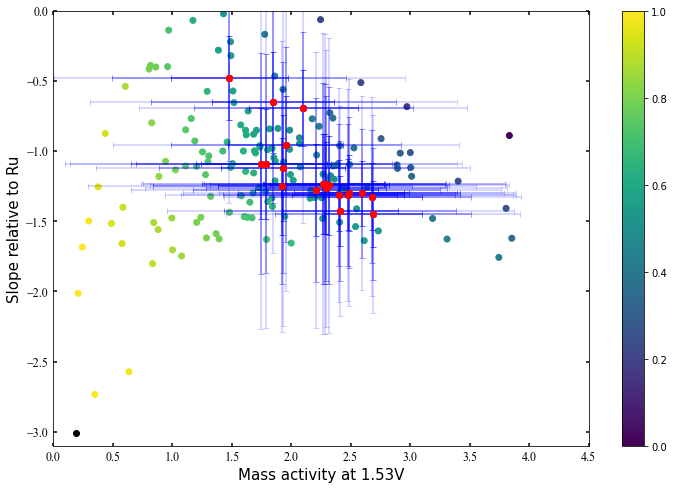

In [4]:
plt.figure(figsize=(12, 8))


plt.scatter(ref_point[0], ref_point[1], color='black')

plt.xlim(0, 4.5)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5], fontsize=15, fontname='Times New Roman')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, direction='in', width=1.5, labelsize=12, pad=5)


plt.ylim(-3.1, 0)
plt.yticks([-3, -2.5, -2, -1.5, -1, -0.5, 0], fontsize=15, fontname='Times New Roman')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
plt.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, direction='in', width=1.5, labelsize=12, pad=5)



plt.scatter(y1, y2, c=hv, cmap='viridis_r')
plt.scatter(y1_new, y2_new,color='red')

plt.errorbar(y1_new,y2_new, xerr= np.sqrt(y1_var) , yerr= np.sqrt(y2_var) , fmt='o', color='red', ecolor=(0, 0, 1, 0.6), capsize=3)
plt.errorbar(y1_new,y2_new, xerr= 2* np.sqrt(y1_var) , yerr= 2* np.sqrt(y2_var) , fmt='o', color='red', ecolor=(0, 0, 1, 0.4), capsize=3)
plt.errorbar(y1_new,y2_new, xerr= 3* np.sqrt(y1_var) , yerr= 3* np.sqrt(y2_var) , fmt='o', color='red', ecolor=(0, 0, 1, 0.2), capsize=3)


# plt.fill_between(y1_new[0],
#                  y2_new[0] + np.sqrt(y2_var)[0],
#                  y2_new[0] - np.sqrt(y2_var)[0], color="C0", alpha=0.6)



plt.colorbar()


plt.xlabel('Mass activity at 1.53V',fontsize=15)
plt.ylabel('Slope relative to Ru', fontsize=15)
# plt.title('Scatter Plot')


plt.show

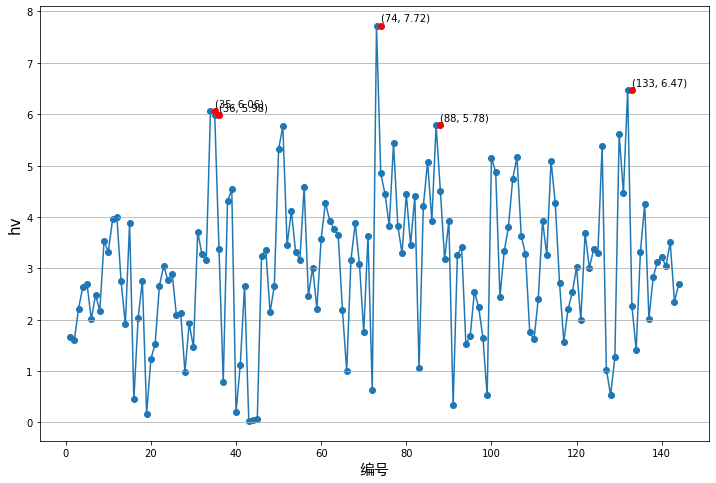

In [25]:
plt.figure(figsize=(12, 8))


plt.scatter(df.index, hv, marker='o')
plt.xlabel('编号', fontproperties='SimHei',fontsize=15)
plt.ylabel('hv',fontsize=15)

plt.plot(df.index, hv)

index = np.argsort(hv)[-5:]



for i in index:
    

    plt.plot(df.index[i+1], hv[i+1], marker='o', c='r')
    plt.annotate('({:.0f}, {:.2f})'.format(df.index[i+1], hv[i+1]), (df.index[i+1], hv[i+1]+0.1))
   


plt.grid(True, axis='y')

plt.show()

In [ ]:
To visualize the data as a picture after PCA (Principal Component Analysis) dimensionality reduction with more than 3 dimensions, you can follow these steps:

1. Perform PCA: Apply PCA to your dataset and obtain the reduced dataset with the desired number of principal components (dimensions). The sklearn.decomposition module in Python is useful for performing PCA.

2. Choose a visualization method: Since it's not possible to directly visualize data in higher dimensions (greater than 3), you will need to use a visualization method suitable for representing high-dimensional data in a 2D or 3D plot.

Some common techniques are:

  a. Biplot: A biplot represents both the principal components (as axes) and the original features (as vectors) in the same graph.

  b. Pairwise scatterplots: You can create scatterplots for each pair of principal components to get an insight into their relationship.

  c. Heatmap: A heatmap can be used to visualize correlations between the original features and the principal components.

3. Select the top principal components: In most scenarios, the first few principal components capture most of the variance in the data. You can choose the top principal components (based on the amount of variance explained) for the visualization.

4. Create the plot: Depending on the chosen visualization method, create the plot using the appropriate Python library such as matplotlib, seaborn, or plotly.

Here's example code for visualizing 4-dimensional PCA data using pairwise scatterplots with Python:


This will produce a scatter plot matrix of all the possible pairs of principal components (PC1 vs PC2, PC1 vs PC3, etc.) that you can use to visualize the 4-dimensional PCA reduced data.

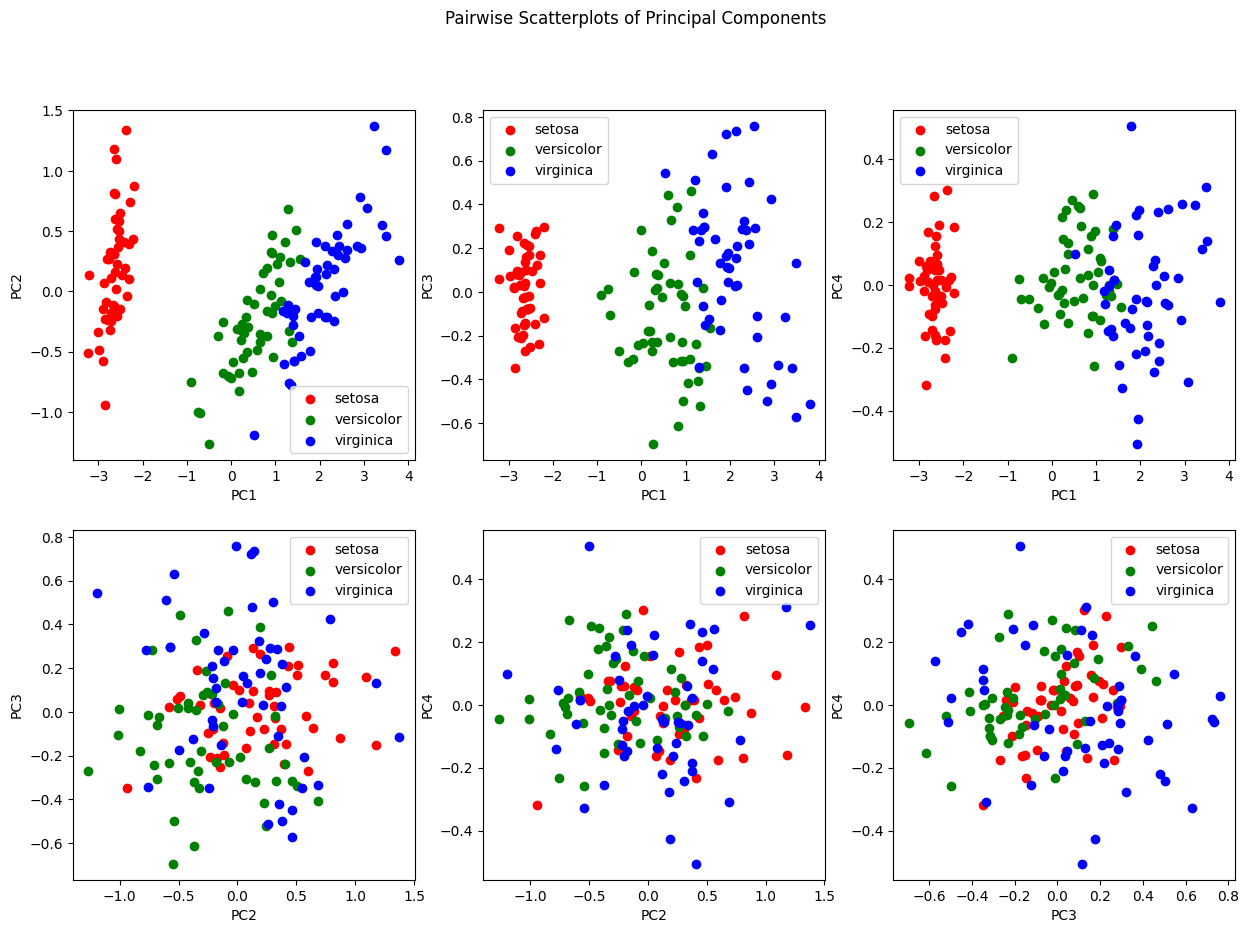

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset and perform PCA
data = load_iris()
X = data.data
y = data.target

pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X)

# Pairwise scatterplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, combination in enumerate([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]):
    ax = axes[i // 3, i % 3]
    
    x_data = X_reduced[:, combination[0]]
    y_data = X_reduced[:, combination[1]]
    
    ax.scatter(x_data[y == 0], y_data[y == 0], label=data.target_names[0], color='r')
    ax.scatter(x_data[y == 1], y_data[y == 1], label=data.target_names[1], color='g')
    ax.scatter(x_data[y == 2], y_data[y == 2], label=data.target_names[2], color='b')
    
    ax.set_xlabel(f"PC{combination[0] + 1}")
    ax.set_ylabel(f"PC{combination[1] + 1}")
    ax.legend()

plt.suptitle("Pairwise Scatterplots of Principal Components")
plt.show()

In [ ]:
We'll begin by reducing the dimensions of a dataset using PCA (Principal Component Analysis) and then visualize that reduced data using a heatmap.

Here's a step-by-step guide including sample Python code:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load sample data
iris = load_iris()

X = iris.data # Feature matrix
y = iris.target # Target vector

# Data preprocessing (Scale the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute the correlations between the original features and PCA components
correlations = np.corrcoef(X_scaled.T, X_pca.T)

# Extract correlations between original features and PCA components
correlations = correlations[:X.shape[1], -X_pca.shape[1]:]
correlations_df = pd.DataFrame(correlations, index=iris.feature_names, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Visualize the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlations_df, annot=True, cmap="coolwarm")
plt.title("Correlations between original features and PCA components")
plt.show()


This code will generate a heatmap showing correlations between the original features and the principal components. You can customize the code by changing the dataset, PCA parameters, or heatmap appearance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load sample data
iris = load_iris()

X = iris.data # Feature matrix
y = iris.target # Target vector

# Data preprocessing (Scale the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute the correlations between the original features and PCA components
correlations = np.corrcoef(X_scaled.T, X_pca.T)

# Extract correlations between original features and PCA components
correlations = correlations[:X.shape[1], -X_pca.shape[1]:]
correlations_df = pd.DataFrame(correlations, index=iris.feature_names, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Visualize the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlations_df, annot=True, cmap="coolwarm")
plt.title("Correlations between original features and PCA components")
plt.show()


ModuleNotFoundError: No module named 'seaborn'